<a href="https://colab.research.google.com/github/JUSTYNAYANG/summerpy/blob/main/20230920.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lat and Lon find X

In [ ]:
import math

$$log_2(2^x)=x$$

$$log_2(16)=?$$

$$log_{10}(100)=?$$

In [ ]:
#math.floor(x, /)
#return the largest integer <= x
math.floor(4.5)

4

In [ ]:
#log(x, [base = math.e])
#math.log

In [ ]:
#return tanget of x (in radians)
#math.tan()

In [ ]:
math.pi

3.141592653589793

In [ ]:
def gps2xy(lat, lon, z):
  x = math.floor((lon+180)/360*2**z)
  y = math.floor((1-math.log(math.tan(lat*math.pi/180)+1/math.cos(lat*math.pi/180))/math.pi)*2**(z-1))
  return x, y

In [ ]:
z = 18
x, y = gps2xy(22.6755, 120.2938, z)

In [ ]:
url = f"https://mt.google.com/vt/lyrs=s&x={x}&y={y}&z={z}"

In [ ]:
print(url)

https://mt.google.com/vt/lyrs=s&x=218667&y=114111&z=18


In [ ]:
import requests

In [ ]:
from PIL import Image

In [ ]:
import io
def get_image(x, y, z):
  url = f"https://mt.google.com/vt/lyrs=s&x={x}&y={y}&z={z}"
  r = requests.get(url)
  return Image.open(io.BytesIO(r.content))

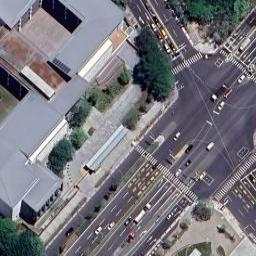

In [ ]:
get_image(x, y, z)

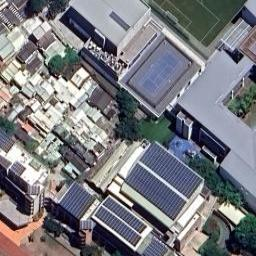

In [ ]:
get_image(x-1, y, z)

In [ ]:
images = []
for i in range(x-1, x+2):
  for j in range(y-1, y+2):
    images.append(get_image(x, y, z))

In [ ]:
x

218667

In [ ]:
y

114111

In [ ]:
z

18

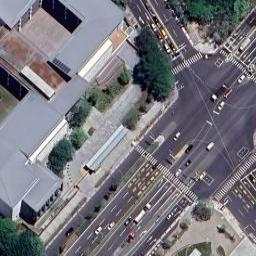

In [ ]:
get_image(x, y, z)

In [ ]:
def zoom_image(x, y, z, a):

  width, height = 256*a, 256*a
  im = Image.new("RGB", (width, height))

  for i in range(x-1, x+2):
    for j in range(y-1, y+2):
      image = get_image(i, j, z)
      im.paste(image, (256*((i-x)+1), 256*((j-y)+1)))
  return im

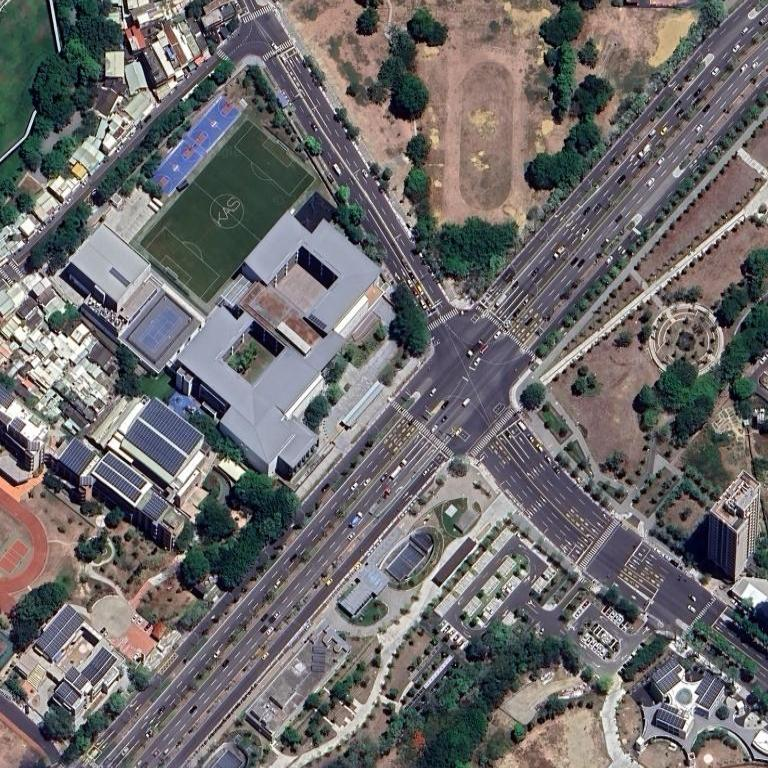

In [ ]:
zoom_image(x, y, z, 3)

In [ ]:
gps2xy(22.6755, 120.2938, z)

(218667, 114111)

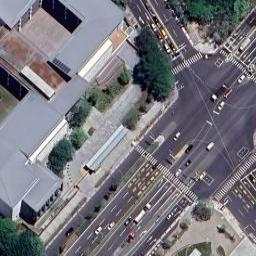

In [ ]:
get_image(218667, 114111, 18)

In [ ]:
def get_bigger_image(x, y, z):
  image = Image.new('RGB', (256*3, 256*3))
  for i in range(x-1, x+2):
    for j in range(y-1, y+2):
      image.paste(get_image(i, j, z), (256*((i-x)+1), 256*((j-y)+1)))
  return image

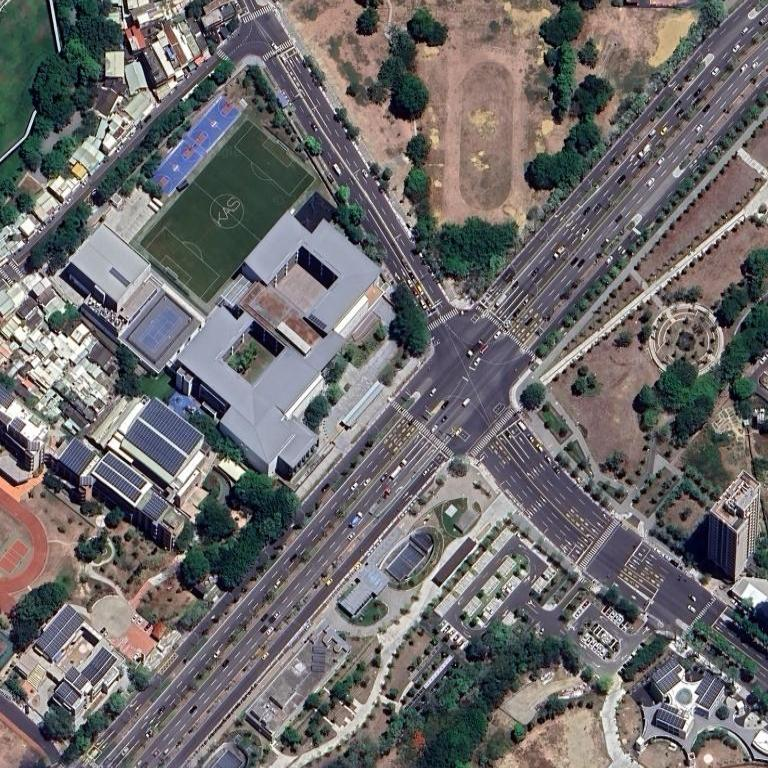

In [ ]:
get_bigger_image(x, y, z)

#Geocoder

In [ ]:
import geocoder

In [ ]:
geocoder.osm('Statue of Liberty').latlng

[40.689253199999996, -74.04454817144321]

In [ ]:
lat, lon = geocoder.osm('Statue of Liberty').latlng

In [ ]:
z = 17
x, y = gps2xy(lat, lon, z)

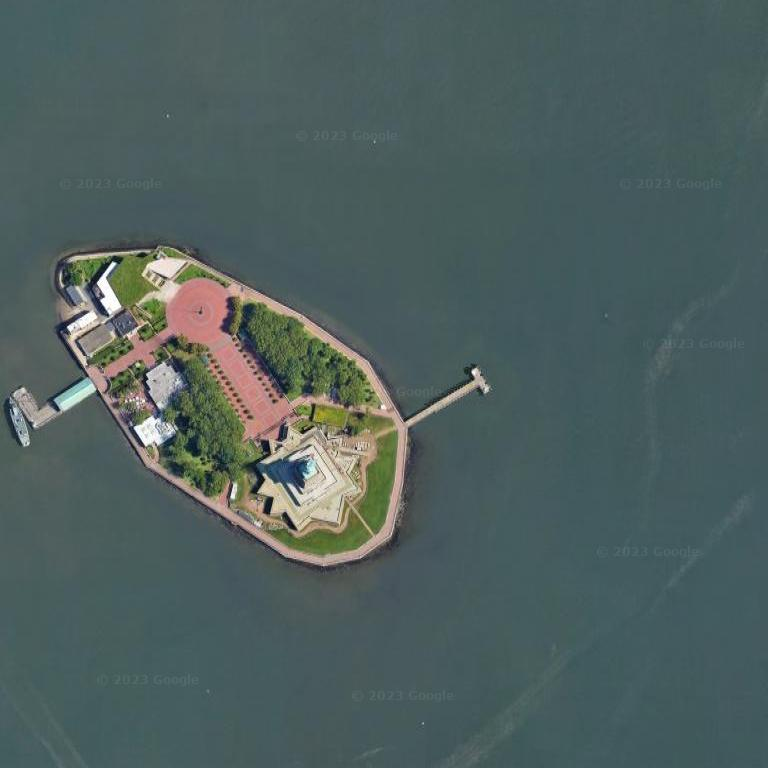

In [ ]:
get_bigger_image(x, y, z)

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def get_gps(place):
  return geocoder.osm(place).latlng

In [ ]:
gr.Interface(get_gps, "text", "text").launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
def xy(place):
  lat, lng = geocoder.osm(place).latlng
  x = math.floor((lon+180)/360*2**z)
  y = math.floor((1-math.log(math.tan(lat*math.pi/180)+1/math.cos(lat*math.pi/180))/math.pi)*2**(z-1))
  return x, y

In [ ]:
xy("Statue of Liberty")

(38577, 49291)

In [219]:
def place2image(place, z):
  lat, lng = geocoder.osm(place).latlng
  x = math.floor((lon+180)/360*2**z)
  y = math.floor((1-math.log(math.tan(lat*math.pi/180)+1/math.cos(lat*math.pi/180))/math.pi)*2**(z-1))

  image = Image.new('RGB', (256*3, 256*3))
  for i in range(x-1, x+2):
    for j in range(y-1, y+2):
      url = f"https://mt.google.com/vt/lyrs=s&x={i}&y={j}&z={z}"
      r = requests.get(url)
      im =  Image.open(io.BytesIO(r.content))
      image.paste(im, (256*((i-x)+1), 256*((j-y)+1)))
  return image


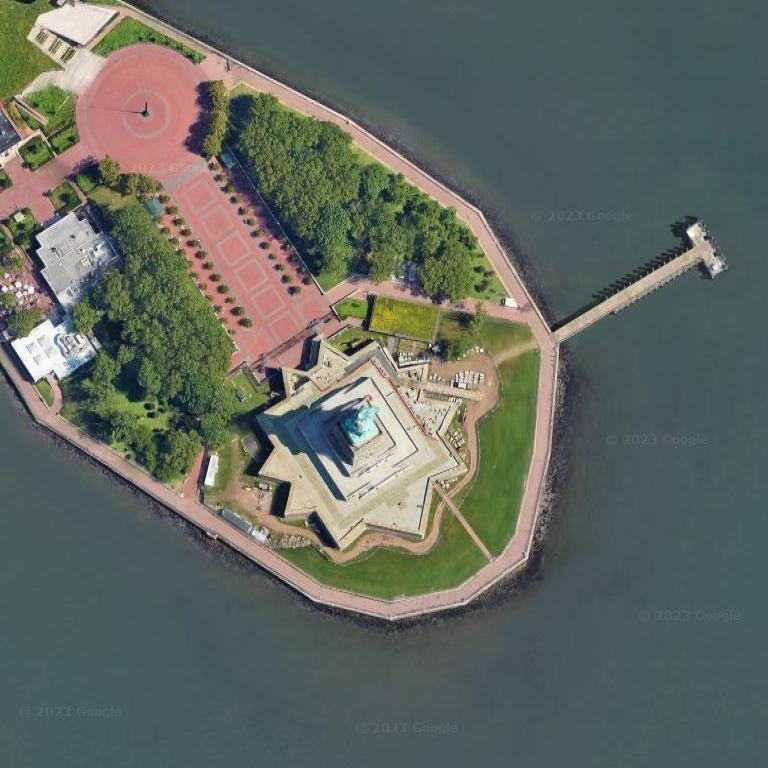

In [235]:
place2image("Statue of Liberty", 18)

In [229]:
def placetoimage(place, z):
  lat, lon = geocoder.osm(place).latlng
  x, y = gps2xy(lat, lon, z)
  image = get_bigger_image(x, y, z)
  return image

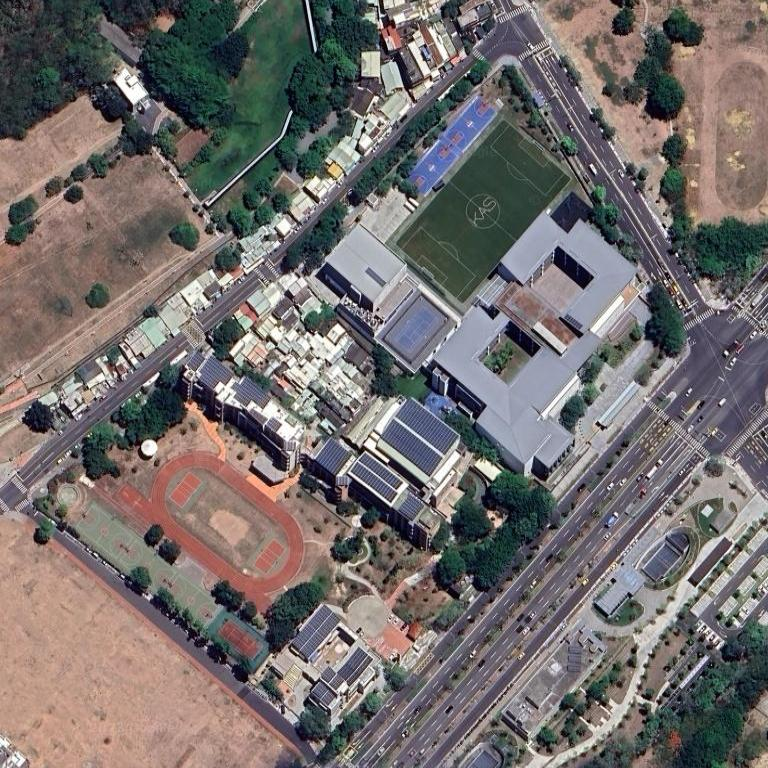

In [232]:
placetoimage("高雄美國學校", 18)